#### Code Explanation

We want to predict house prices using features (like number of bedrooms, bathrooms, square footage, etc.) provided in the kc_house_data.csv dataset. To achieve this, we use a neural network built with Keras, which is a part of TensorFlow.

#### What is a Neural Network?
A neural network is a type of machine learning model inspired by the human brain. It’s great for finding patterns in data, especially when the data is complex. Neural networks work by learning relationships between input features (like house size) and the output (price) during a process called training.

#### The Steps in the Code
We follow the steps below to solve the problem:

kc_house_data.csv veri seti üzerinde bir regresyon modeli geliştireceğiz.
Modelin başarısını değerlendireceğiz.
Modelin tahminlerini analiz ederek sonuçları görselleştireceğiz.

1. kc_house_data.csv Veri Seti Hakkında
Bu veri seti, ev fiyatlarını tahmin etmek için kullanılan özellikleri içerir:

price: Hedef değişken (bağımlı değişken).
bedrooms, bathrooms, sqft_living gibi bağımsız değişkenler: Ev özellikleri (ör. oda sayısı, metrekare, bina durumu).
Veri Yapısı:
Çok sayıda sayısal özellik içeriyor.
Modelimiz, bu özellikler ile ev fiyatlarını tahmin edecek.

2. Kullanacağımız Yöntem
Keras ile Sinir Ağı Regresyon Modeli
Keras: TensorFlow üzerinde çalışan yüksek seviyeli bir kütüphane.
Regresyon Modeli: Sürekli bir değişkeni tahmin etmek için kullanılır.


### Tenderflow'un yüklenip yüklenmediğini kontrol etme

In [2]:
import pkg_resources
installed_packages = [pkg.key for pkg in pkg_resources.working_set]
print("tensorflow" in installed_packages)

True


C:\Users\ACER\AppData\Local\Temp\ipykernel_6864\2788628725.py:1: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


In [3]:
import tensorflow as tf
print(tf.__version__)  # Print the installed TensorFlow version

2.18.0


### Gerekli Kütüphaneleri Yükleme ve Veri Setini Hazırlama

In [4]:
# Gerekli kütüphaneler
import pandas as pd # Helps us load, explore, and manipulate the dataset.
import numpy as np # Used for numerical operations.
import matplotlib.pyplot as plt # Visualization libraries to understand data and model results.
import seaborn as sns # Visualization libraries to understand data and model results.
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
# sklearn: Provides tools for splitting the dataset and preprocessing it (e.g., scaling).
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# tensorflow.kera: A library to build and train the neural network.
from sklearn.metrics import mean_squared_error, explained_variance_score # Used to evaluate the model’s performance.

# Veri setini yükleme
df = pd.read_csv("kc_house_data.csv")
# kc_house_data.csv is loaded into a DataFrame called df.

# İlk 5 satırı inceleme
print(df.head())

# Why is this important? This step ensures we understand what the dataset contains. 
# Each row represents a house, and each column contains information (features) about the house. For example:
# price: The house price (our target). bedrooms, bathrooms, sqft_living: Features that influence the house price.


      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

       lat     long  sqft_living15  sqft_lot

### Veri İncelemesi ve Temizleme

In [5]:
# Veri bilgisi ve eksik değerlerin kontrolü
print(df.info())

# Hedef değişken ve bağımsız değişkenleri ayırma
# Split the Data into Features (X) and Target (y)
# Why: Machine learning models work by learning the relationship between input features (X) and output/target (y). 
# Here, X represents the characteristics of the house, and y represents the price.

X = df.drop('price', axis=1)  # Bağımsız değişkenler
y = df['price']  # Bağımlı değişken (ev fiyatları)
# X contains all the features (independent variables) used to predict the house price.
# y contains the target variable (dependent variable), which is the house price.

# Eğitim ve test setlerine ayırma
# Split the Data into Training and Test Sets
# Why: The model should learn on one portion of the data (training set) and be tested on unseen data (test set). This helps us evaluate how well the model performs on new data.
# The data is split into two parts:
# Training set (70%): Used to train the model. Test set (30%): Used to evaluate the model.
# random_state=42: Ensures the split is reproducible (same random split every time).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Veriyi ölçeklendirme (MinMaxScaler kullanarak)
# Scale the data
# Why: Neural networks perform better when input values are scaled, as it prevents one feature (e.g., sqft_living) from dominating others (e.g., bedrooms).
# MinMaxScaler scales the feature values to a range of [0, 1].
# fit_transform: Learns the scaling parameters from the training set and applies them.
# transform: Applies the learned scaling to the test set.

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int64  
 7   view           21597 non-null  int64  
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  int64  
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  int64  
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64  
 18  month 

### Sinir Ağır Modeli Oluşturma

In [6]:
# Keras ile model oluşturma
# Build the Neural Network
# Sequential: A simple neural network where layers are stacked sequentially.
# Why: The neural network learns patterns in the data through these layers.

model = Sequential()

# Katmanlar ekleme
# Dense: Fully connected layers.
model.add(Dense(27, activation='relu'))  # İlk gizli katman - # 27: First layer has 27 neurons (arbitrary choice).
model.add(Dense(18, activation='relu'))  # İkinci gizli katman - # # 18 and 9: Second and third layers reduce the number of neurons gradually.
model.add(Dense(9, activation='relu'))   # Üçüncü gizli katman
# # activation='relu': Rectified Linear Unit activation function, which introduces non-linearity to the model.
model.add(Dense(1))  # Çıkış katmanı (tek bir sürekli değişken tahmini)
# Final layer has 1 neuron (predicting house price).

# Modeli derleme
# Why: The optimizer minimizes the loss function, making the model better at predicting prices.
model.compile(optimizer='adam', loss='mse')  # Adam optimizasyonu ve MSE kayıp fonksiyonu
# optimizer='adam': Adam optimizer adjusts the model’s weights during training.
# loss='mse': Mean Squared Error is the loss function used for regression.

### Modeli Eğitme

Epoch 1/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 426970415104.0000 - val_loss: 413376610304.0000
Epoch 2/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 410813956096.0000 - val_loss: 320656113664.0000
Epoch 3/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 294645956608.0000 - val_loss: 147067912192.0000
Epoch 4/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 134452690944.0000 - val_loss: 99868844032.0000
Epoch 5/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 100269752320.0000 - val_loss: 97390641152.0000
Epoch 6/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 97858985984.0000 - val_loss: 95404621824.0000
Epoch 7/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 90135814144.0000 - val_loss: 93382565888.0000
Epoch 8/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 90576797696.0000 - val_loss: 91166965760.0000
Epoch 9/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 99596820480.0000 - val_loss: 88897806336.0000
Epoch 10/100
473/473 ━━━━━━━━

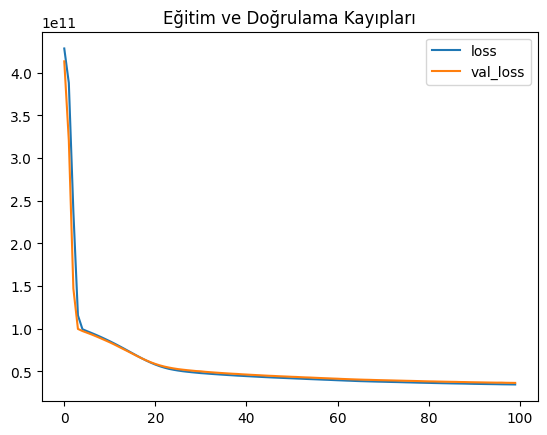

In [7]:
# Modeli eğitme
# Why: Training allows the model to learn from the data and improve its predictions over time.
# fit: Trains the model on the training set and evaluates it on the test set after each epoch.
# epochs=100: The model goes through the entire training set 100 times.
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)



# Kayıpları görselleştirme
# The training and validation losses are plotted to see how well the model is learning.
losses = pd.DataFrame(history.history)
losses.plot()
plt.title("Eğitim ve Doğrulama Kayıpları")
plt.show()


### Modelin Değerlendirilmesi

203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Mean Squared Error (MSE): 36639759299.4242
Explained Variance Score (EVS): 0.723739292639791


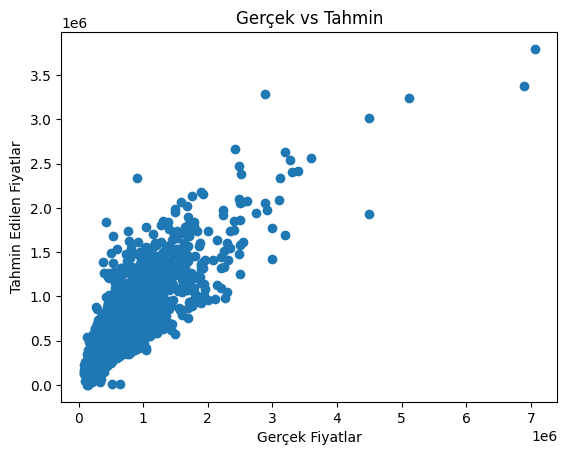

In [8]:
# Tahminler
predictions = model.predict(X_test)

# Model değerlendirme
# predict: The model makes predictions on the test data.
# MSE: Measures the average squared error between predictions and actual values.
# EVS: Measures how well the model explains the variance in the data.
mse = mean_squared_error(y_test, predictions)  # Ortalama kare hata (MSE)
evs = explained_variance_score(y_test, predictions)  # Açıklanan varyans skoru
print(f"Mean Squared Error (MSE): {mse}")
print(f"Explained Variance Score (EVS): {evs}")

# MSE: Tahmin edilen fiyatların gerçek fiyatlara olan uzaklığını ölçer. Daha düşük bir MSE, daha iyi bir model anlamına gelir.
# EVS: Modelin veri varyansını ne kadar iyi açıkladığını ölçer. 1'e yakın bir değer iyi bir performansı gösterir.

# Gerçek ve tahmin edilen değerlerin görselleştirilmesi
# Gerçek fiyatlar ile tahmin edilen fiyatların benzerliği incelenir.
plt.scatter(y_test, predictions)
plt.xlabel("Gerçek Fiyatlar")
plt.ylabel("Tahmin Edilen Fiyatlar")
plt.title("Gerçek vs Tahmin")
plt.show()


### Hata Analizi

Hataların dağılımı analiz edilerek modelin hangi aralıklarda daha fazla hata yaptığı anlaşılır.

203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step
Mean Squared Error (MSE): 36639759299.4242
Explained Variance Score (EVS): 0.723739292639791


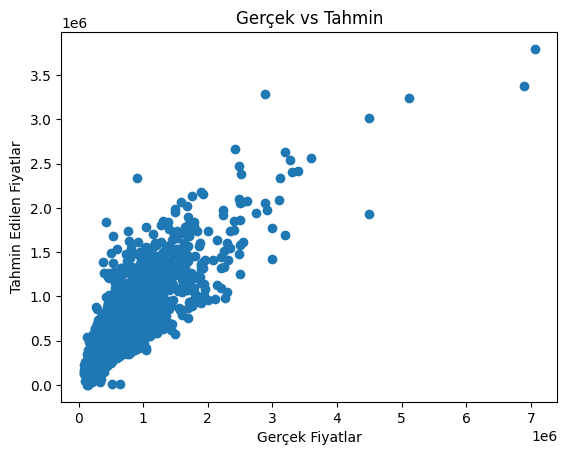

In [9]:
# Tahminler
predictions = model.predict(X_test)

# Model değerlendirme
mse = mean_squared_error(y_test, predictions)  # Ortalama kare hata (MSE)
evs = explained_variance_score(y_test, predictions)  # Açıklanan varyans skoru
print(f"Mean Squared Error (MSE): {mse}")
print(f"Explained Variance Score (EVS): {evs}")

# Gerçek ve tahmin edilen değerlerin görselleştirilmesi
plt.scatter(y_test, predictions)
plt.xlabel("Gerçek Fiyatlar")
plt.ylabel("Tahmin Edilen Fiyatlar")
plt.title("Gerçek vs Tahmin")
plt.show()


<Axes: ylabel='Count'>

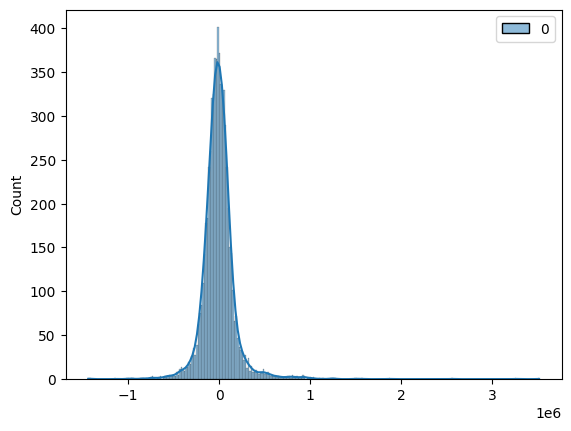

In [10]:
errors = y_test.values.reshape(-1, 1) - predictions
sns.histplot(errors, kde=True)

### Model İle Tahmin

In [11]:
# Yeni bir örnek veri ile tahmin
sample = df.drop('price', axis=1).iloc[0]  # İlk veri örneğini al
sample_scaled = scaler.transform(sample.values.reshape(-1, X.shape[1]))  # Ölçeklendirme
predicted_price = model.predict(sample_scaled)  # Tahmin
print(f"Tahmin Edilen Fiyat: {predicted_price[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Tahmin Edilen Fiyat: 269953.96875


C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
